In [94]:
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

pd.options.display.max_rows = 20
pd.options.display.min_rows = 20

In [2]:
data = pd.read_csv('../datasets/baseball/FG_2010_2018_inning_6_load.csv')

## Explore the Data

In [3]:
data.head(2)

,Season,Name,Team,G,Age,PA,HR,R,RBI,SB,...,f_val_SB_rate,f_val_rate,ny_f_val_rate,HR_rate_std,R_rate_std,RBI_rate_std,SB_rate_std,AVG_std,f_val_std,ny_f_val_std
0,2017,Mookie Betts,Red Sox,153,24,712,24,101,102,26,...,1.83,2.43,0.745460,0.077212,1.205684,1.226771,1.542399,-0.087713,3.964353,12.516023
1,2017,Christian Yelich,Marlins,156,25,695,18,100,81,16,...,0.71,0.77,0.816703,-0.543295,1.037601,0.094554,0.596226,0.534600,1.719685,10.721773


In [4]:
data.describe()

,Season,G,Age,PA,HR,R,RBI,SB,BB%,K%,...,f_val_SB_rate,f_val_rate,ny_f_val_rate,HR_rate_std,R_rate_std,RBI_rate_std,SB_rate_std,AVG_std,f_val_std,ny_f_val_std
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,...,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,2013.550260,141.068458,28.214038,579.262565,18.353553,72.337955,69.570191,10.006932,0.085828,0.183038,...,0.049159,0.195347,0.029685,0.106438,0.175737,0.127342,0.044009,0.127762,0.581287,0.260231
std,2.314325,16.168980,3.662962,86.555025,9.940838,18.773729,22.253659,11.004136,0.030436,0.056472,...,1.147934,1.342655,0.521885,1.015281,0.980659,1.006717,1.014020,0.971037,3.076915,3.240759
min,2010.000000,93.000000,19.000000,400.000000,0.000000,26.000000,17.000000,0.000000,0.021000,0.058000,...,-1.000000,-2.620000,-1.000000,-2.080068,-2.711601,-2.717538,-0.969940,-3.869888,-7.862697,-7.862697
25%,2012.000000,130.000000,26.000000,511.000000,11.000000,58.000000,52.000000,2.000000,0.063000,0.142000,...,-0.770000,-0.727500,-0.366880,-0.695430,-0.534081,-0.627220,-0.666457,-0.535968,-1.690974,-2.160351
50%,2014.000000,145.000000,28.000000,587.500000,17.000000,71.500000,68.000000,6.000000,0.083000,0.179000,...,-0.340000,-0.015000,-0.005117,0.062385,0.141844,0.120951,-0.299616,0.133874,0.417967,0.045613
75%,2016.000000,155.000000,31.000000,652.000000,25.000000,85.000000,85.000000,14.000000,0.105000,0.219000,...,0.527500,0.957500,0.366121,0.822500,0.817740,0.809049,0.457565,0.772735,2.528986,2.423202
max,2017.000000,162.000000,40.000000,754.000000,59.000000,137.000000,139.000000,68.000000,0.206000,0.372000,...,7.140000,6.980000,1.888168,3.665980,3.934791,3.489644,6.189380,3.507457,11.463261,12.516023


In [5]:
data.columns

Index(['Season', 'Name', 'Team', 'G', 'Age', 'PA', 'HR', 'R', 'RBI', 'SB',
       'BB%', 'K%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'EV',
       'BsR', 'Off', 'O-Swing%', 'Z-Swing%', 'O-Contact%', 'Z-Contact%',
       'GB/FB', 'LD%', 'GB%', 'HR/FB', 'playerid', 'f_val_HR', 'f_val_R',
       'f_val_RBI', 'f_val_SB', 'f_val_BA', 'f_val', 'ny_f_val', 'HR_rate',
       'R_rate', 'RBI_rate', 'SB_rate', 'f_val_HR_rate', 'f_val_R_rate',
       'f_val_RBI_rate', 'f_val_SB_rate', 'f_val_rate', 'ny_f_val_rate',
       'HR_rate_std', 'R_rate_std', 'RBI_rate_std', 'SB_rate_std', 'AVG_std',
       'f_val_std', 'ny_f_val_std'],
      dtype='object')

## Create data structures for use in models

In [6]:
# define columns that won't be used in predictive modeling
drop_cols = ['Name', 'Team', 'f_val_HR', 'f_val_R','f_val_RBI','f_val_SB','f_val_BA', 
             'f_val', 'ny_f_val', 'HR', 'R', 'RBI', 'SB', 'f_val_HR_rate', 'f_val_R_rate', 
             'f_val_RBI_rate', 'f_val_SB_rate', 'f_val_rate', 'ny_f_val_rate', 'HR_rate_std', 
             'R_rate_std', 'RBI_rate_std','SB_rate_std', 'AVG_std', 'f_val_std']

# create DataFrame for use in data visualization
data2 = data.drop(drop_cols, axis=1)

In [7]:
# drop column EV due to missing entries (shows in in-depth data exploration notebook)
data2 = data2.drop('EV', axis=1)

In [8]:
# dropping columns using methodology from in-depth data exploration notebook
drop_cols2 = ['G', 'Age', 'BB%', 'K%', 'BABIP', 'BsR', 'O-Swing%', 
           'Z-Swing%', 'O-Contact%', 'Z-Contact%', 'GB/FB', 'LD%', 
           'GB%', 'SB_rate', 'ISO', 'OBP', 'wOBA', 'wRC+', 'SLG', 'HR/FB']

data3 = data2.drop(drop_cols2, axis=1)

In [9]:
# test on 2 most recent years of data (index 300 is cut off)
# used for all models except Elastic Net
df_train = data3[300:]
df_test = data3[:300]

# use to retain more features for Elastic Net
df_train_enet = data2[300:]
df_test_enet = data2[:300]

In [10]:
# remove target from X
X_train = df_train.drop('ny_f_val_std', axis=1)
X_test = df_test.drop('ny_f_val_std', axis=1)

# use for Elastic Net
X_train_enet = df_train_enet.drop('ny_f_val_std', axis=1)
X_test_enet = df_test_enet.drop('ny_f_val_std', axis=1)

# create target y
y_train = df_train['ny_f_val_std']
y_test = df_test['ny_f_val_std']

In [11]:
# hold onto season column
train_season = X_train['Season']
test_season = X_test['Season']

#hold onto playerid column
train_ID = X_train['playerid']
test_ID = X_test['playerid']

#Now drop the  'playerid' and 'Season' columns since they are unnecessary for the prediction process
X_train.drop(["playerid", "Season"], axis=1, inplace = True)
X_test.drop(["playerid", "Season"], axis=1, inplace = True)
X_train_enet.drop(["playerid", "Season"], axis=1, inplace = True)
X_test_enet.drop(["playerid", "Season"], axis=1, inplace = True)

In [12]:
X_train.head(1)

,PA,AVG,Off,HR_rate,R_rate,RBI_rate
300,654,0.291,23.1,0.124138,0.634483,0.531034


In [13]:
y_train.head()

300    8.210223
301    7.567880
302    6.856675
303    6.657771
304    6.631371
Name: ny_f_val_std, dtype: float64

### Scale the data

In [14]:
# retain column names before changing data structure
X_train_cols = X_train.columns
X_train_enet_cols = X_train_enet.columns

# Create normalized inputs for LinearRegression, XGBoost, and LGBoost
norm_scaler = MinMaxScaler()
X_train_normal = norm_scaler.fit_transform(X_train)
X_test_normal = norm_scaler.transform(X_test)

# create standardized inputs for ENet
stand_scaler = StandardScaler()
X_train_standard = stand_scaler.fit_transform(X_train_enet)
X_test_standard = stand_scaler.transform(X_test_enet)

## Modeling

#### Baseline Model

In [15]:
lin_model = LinearRegression()

lin_model.fit(X_train_normal, y_train)
lin_preds = lin_model.predict(X_test_normal)

lin_resids = (y_test - lin_preds)

lin_MSE = mean_squared_error(y_test, lin_preds)
lin_r2 = r2_score(y_test, lin_preds)

print('Lin MSE:', lin_MSE)
print('R2:', lin_r2)

Lin MSE: 8.633967983991392
R2: 0.2378720755819861


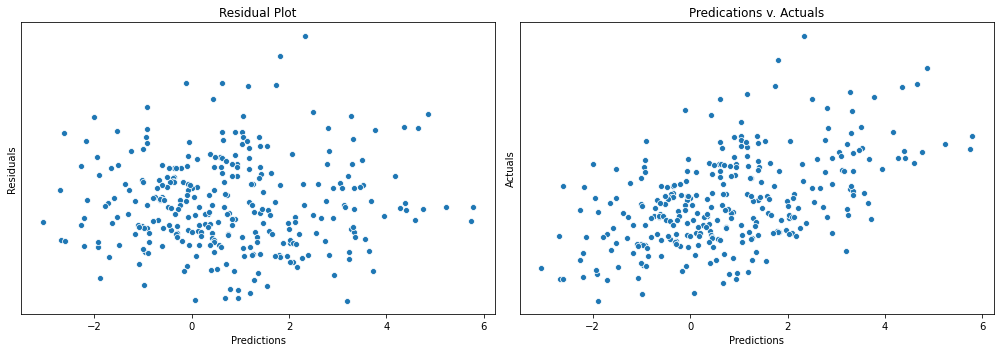

In [16]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=lin_preds, y=lin_resids, ax=axes[0])
axes[0].set_title('Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=lin_preds, y=y_test, ax=axes[1])
axes[1].set_title('Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

In [17]:
# # can use to see coefficients of features
# lin_coef_dict = {}
# for coef, feat in zip(lin_model.coef_,X_train_cols):
#     lin_coef_dict[feat] = coef
# lin_coef_dict

#### Random Forest Model

In [100]:
#run once to find optimal params (takes awhile)
rf_model = RandomForestRegressor(random_state=35, criterion='mse')

params = {
        'n_estimators': range(135,150,1),
        'min_samples_split': range(6,15,1),
        'max_depth': [2, 3, 4]
        }

# use GridSearchCV for finding optimal hyperparams
search_rf = GridSearchCV(estimator=rf_model, param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

search_rf.fit(X_train, y_train)
search_rf.best_params_

{'max_depth': 3, 'min_samples_split': 14, 'n_estimators': 142}

In [97]:
rf_model = search_rf.best_estimator_
rf_model.fit(X_train_normal, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=6, n_estimators=140,
                      random_state=35)

In [98]:
rf_preds = rf_model.predict(X_test_normal)

rf_resids = (y_test - rf_preds)

rf_MSE = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
print('MSE:', rf_MSE)
print('R2:', rf_r2)

MSE: 8.644776477815055
R2: 0.23691800035502342


#### XGB Model

In [18]:
#run once to find optimal params (takes awhile)
xgb_reg = XGBRegressor(learning_rate=0.05, random_state=35, objective='reg:squarederror')

params = {
        'n_estimators': [25, 50, 100],
        'min_child_weight': [5, 10, 15],
        'gamma': [1.5, 2, 5],
        'subsample': [0.4, 0.6],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4]
        }

# use GridSearchCV for finding optimal hyperparams
search_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

search_xgb.fit(X_train, y_train)
search_xgb.best_params_

{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 4,
 'min_child_weight': 15,
 'n_estimators': 50,
 'subsample': 0.4}

In [19]:
xgb_reg = search_xgb.best_estimator_
xgb_reg.fit(X_train_normal, y_train)

XGBRegressor(colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=4,
             min_child_weight=15, n_estimators=50, objective='reg:squarederror',
             random_state=35, subsample=0.4)

In [20]:
xgb_preds = xgb_reg.predict(X_test_normal)

xgb_resids = (y_test - xgb_preds)

xgb_MSE = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
print('MSE:', xgb_MSE)
print('R2:', xgb_r2)

MSE: 8.850458333303697
R2: 0.21876228262423603


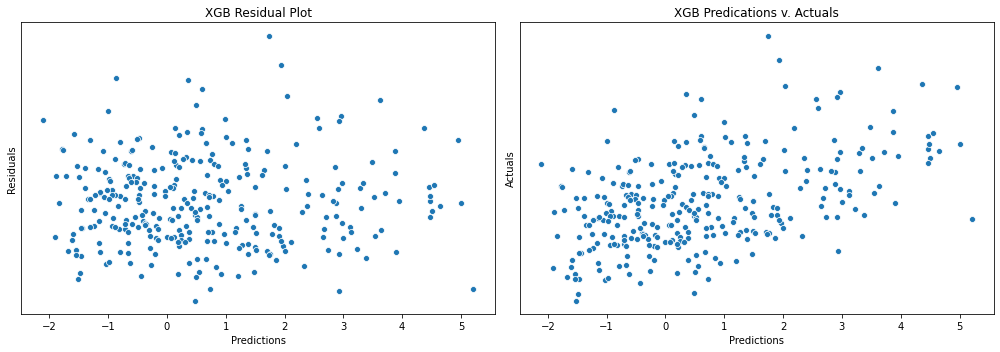

In [21]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=xgb_preds, y=xgb_resids, ax=axes[0])
axes[0].set_title('XGB Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=xgb_preds, y=y_test, ax=axes[1])
axes[1].set_title('XGB Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### Elastic Net Model

In [22]:
# use standardized inputs for ENet

# use GridSearchCV for finding optimal hyperparams
search = GridSearchCV(ElasticNet(max_iter=5000, random_state=35, tol=0.1), param_grid={'alpha':np.logspace(-5, 2, 8), 'l1_ratio':[.2, .4, .6, .8,]},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10, verbose=1)

In [23]:
search.fit(X_train_standard, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2474.2810317800227, tolerance: 787.224653112479
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2407.772012977907, tolerance: 736.7074974665759
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2635.2845103386744, tolerance: 848.3672255175487
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2335.708962088316, tolerance: 811.3858413915266
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2483.553954374998, tolerance: 777.8127401784743
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2306.5468110481193, tolerance: 752.2295733836527
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018.9015359125528, tolerance: 736.7074974665759
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1336.8303829174044, tolerance: 848.3672255175487
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1217.3859868922154, tolerance: 738.0167662912975
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv=10,
             estimator=ElasticNet(max_iter=5000, random_state=35, tol=0.1),
             n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [24]:
enet_model = search.best_estimator_

# use best enet model and save predictions
enet_preds=enet_model.predict(X_test_standard)

enet_resids = (y_test - enet_preds)

enet_MSE = mean_squared_error(y_test, enet_preds)
enet_r2 = r2_score(y_test, enet_preds)
print('ENet MSE:', enet_MSE)
print('ENet R2:', enet_r2)

ENet MSE: 8.028231538659586
ENet R2: 0.29134096273573007


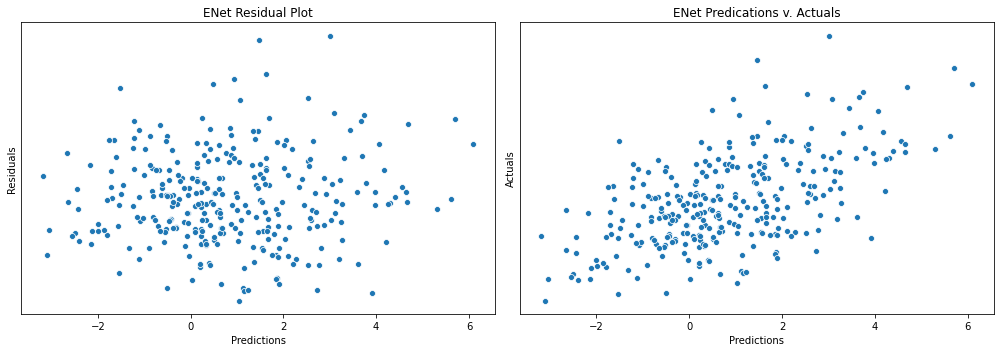

In [25]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=enet_preds, y=enet_resids, ax=axes[0])
axes[0].set_title('ENet Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=enet_preds, y=y_test, ax=axes[1])
axes[1].set_title('ENet Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### LightGB Model

In [32]:
# Tune hyperparamters using Bayesian Hyperparamter Optimization
def bayes_parameter_opt_lgb(X, y, init_round=20, opt_round=30, n_folds=5, random_seed=6, 
                            n_estimators=1000, learning_rate=0.05, output_process=False):
  
  train_data = lgb.Dataset(data=X, label=y)

  def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth,
               lambda_l1, lambda_l2, min_split_gain, min_child_weight):
    
    params = {
        'objective':'regression',
        'learning_rate':learning_rate, 
        'metric':'rmse'
        }
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight

    cv_result = lgb.cv(params, train_data, num_boost_round=1000, nfold=3, seed=random_seed,
                           stratified=False, verbose_eval =200, metrics=['rmse'])

    return min(cv_result['rmse-mean'])

    # setting range of the parameters
  lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                          'feature_fraction': (0.1, 0.9),
                                          'bagging_fraction': (0.5, 1),
                                          'max_depth': (5, 8.99),
                                          'lambda_l1': (0, 5),
                                          'lambda_l2': (0, 3),
                                          'min_split_gain': (0.001, 0.1),
                                          'min_child_weight': (5, 25)}, random_state=0)
  # optimize
  lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
  # output optimization process
  if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
  # return
  return lgbBO

In [33]:
opt_params = bayes_parameter_opt_lgb(X_train_normal, y_train, init_round=5, opt_round=10, n_folds=5, random_seed=35)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
[200]	cv_agg's rmse: 2.94337 + 0.0823205
[400]	cv_agg's rmse: 3.05621 + 0.0885269
[600]	cv_agg's rmse: 3.06328 + 0.0838544
[800]	cv_agg's rmse: 3.06328 + 0.0838544
[1000]	cv_agg's rmse: 3.06328 + 0.0838544
|  1        |  2.792    |  0.7744   |  0.6722   |  3.014    |  1.635    |  6.69     |  17.92    |  0.04432  |  42.73    |
[200]	cv_agg's rmse: 2.89844 + 0.0971212
[400]	cv_agg's rmse: 3.01028 + 0.077886
[600]	cv_agg's rmse: 3.07719 + 0.0816531
[800]	cv_agg's rmse: 3.10878 + 0.0789332
[1000]	cv_agg's rmse: 3.11434 + 0.071111
|  2        |  2.767    |  0.9818   |  0.4068   |  3.959    |  1.587    |  7.266    |  23.51    |  0.008033 |  25.83    |
[200]	cv_agg's rmse: 2.9605 + 0.0791433
[400]	cv_agg's rmse: 3.0372 + 0.0796182
[600]	cv_agg's rmse: 3

In [34]:
params = opt_params.max['params']
params

{'bagging_fraction': 0.8071874312473927,
 'feature_fraction': 0.7539323273793664,
 'lambda_l1': 3.547503176919834,
 'lambda_l2': 2.2411369400750387,
 'max_depth': 8.095918426268778,
 'min_child_weight': 19.07382997774554,
 'min_split_gain': 0.01252398236526759,
 'num_leaves': 31.01141375588943}

In [35]:
# set params for model based on optimal params
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "bagging_frequency" : 5,
    "bagging_seed" : 2018,
    "verbosity" : -1,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'lambda_l1': 3.5,
    'lambda_l2': 2.2,
    'max_depth': 8,
    'min_child_weight': 19,
    'min_split_gain': 0.0,
    'num_leaves': 31

}

In [36]:
lgb_model = lgb.LGBMRegressor(**params)

In [37]:
lgb_model.fit(X_train_normal, y_train)
lgb_preds = lgb_model.predict(X_test_normal)

lgb_resids = (y_test - lgb_preds)

lgb_MSE = mean_squared_error(y_test, lgb_preds)
lgb_r2 = r2_score(y_test, lgb_preds)
print('LGB MSE:', lgb_MSE)
print('LGB R2:', lgb_r2)

LGB MSE: 9.748544045801163
LGB R2: 0.13948746931889977


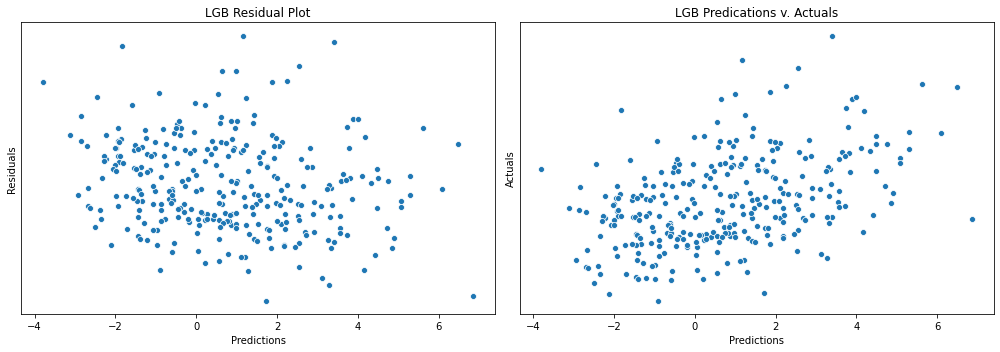

In [38]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=lgb_preds, y=lgb_resids, ax=axes[0])
axes[0].set_title('LGB Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=lgb_preds, y=y_test, ax=axes[1])
axes[1].set_title('LGB Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### SVM Model

In [39]:
# use GridSearchCV for finding optimal hyperparams
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}

svm_search = GridSearchCV(SVR(), param_grid=svm_params,verbose=3,
                      scoring='neg_mean_squared_error',n_jobs=1,cv=5)

svm_search.fit(X_train_normal, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-9.395, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-7.516, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-6.260, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-6.816, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-9.790, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-9.300, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-8.584, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-7.407, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-7.335, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ...... C=0.1, gamma=0.1, kernel=rbf, score=-11.462, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ... C=0.1, gamma=0.01, kernel=linear, score=-9.395, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ... C=0.1, gamma=0.01, kernel=linear, score=-7.516, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ... C=0.1, gamma=0.01, kernel=linear, score=-6.260, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .

[CV] .... C=1, gamma=0.001, kernel=linear, score=-6.141, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .... C=1, gamma=0.001, kernel=linear, score=-7.206, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .... C=1, gamma=0.001, kernel=linear, score=-9.260, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ...... C=1, gamma=0.001, kernel=rbf, score=-12.776, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-9.403, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-8.353, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-8.010, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ...... C=100, gamma=1, kernel=linear, score=-6.165, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ...... C=100, gamma=1, kernel=linear, score=-7.335, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ...... C=100, gamma=1, kernel=linear, score=-9.284, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ......... C=100, gamma=1, kernel=rbf, score=-9.725, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ......... C=100, gamma=1, kernel=rbf, score=-8.223, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ......... C=100, gamma=1, kernel=rbf, score=-6.389, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ......... C=100, gamma=1, kernel=rbf, score=-7.452, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=3)

In [40]:
svm_model = svm_search.best_estimator_

svm_preds = svm_model.predict(X_test_normal)

svm_resids = (y_test - svm_preds)

svm_MSE = mean_squared_error(y_test, svm_preds)
svm_r2 = r2_score(y_test, svm_preds)
print('SVM MSE:', svm_MSE)
print('SVM R2:', svm_r2)

SVM MSE: 8.71049813476533
SVM R2: 0.23111669206969088


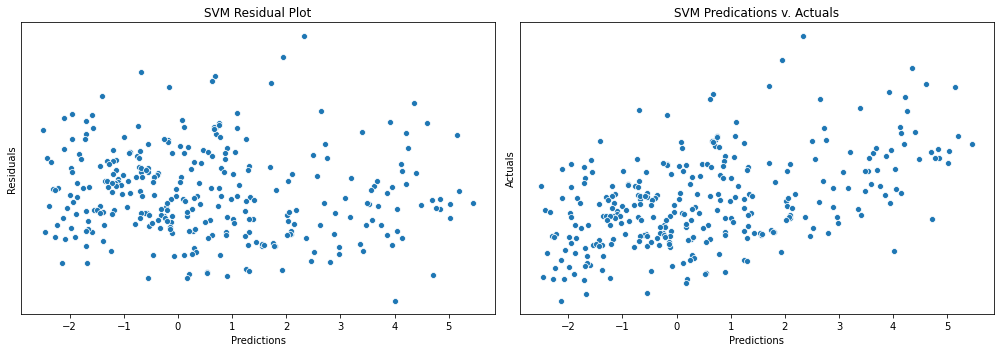

In [41]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=svm_preds, y=svm_resids, ax=axes[0])
axes[0].set_title('SVM Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=svm_preds, y=y_test, ax=axes[1])
axes[1].set_title('SVM Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

## Model Performance Comparison

In [99]:
print('Lin MSE:', round(lin_MSE,3))
print('RF MSE:', round(rf_MSE,3))
print('XGB MSE:', round(xgb_MSE, 3))
print('ENet MSE:', round(enet_MSE, 3))
print('LGB MSE:', round(lgb_MSE,3))
print('SVM MSE:', round(svm_MSE,3))

Lin MSE: 8.634
RF MSE: 8.645
XGB MSE: 8.85
ENet MSE: 8.028
LGB MSE: 9.749
SVM MSE: 8.71


Best model is Elastic Net. Use this model and its predictions for further analysis.

## Compare Versus ADP

In this section, I will be comparing the results of the Elastic Net model against the pre-season rankings as determined by ADP. The two ranking systems will be compared by placing each player into a group _x_ out of *n* groups based on their Predicted FV or ADP, whichever is applicable. The same will be done for Target FV. The groups will then be compared and scored accordingly:

First, the number of correct predictions of players in the top 50% will be calculated:

In [58]:
scoring = pd.DataFrame(data=[['Matches Placement','+1'], ['Does Not Match', '0']], columns=['Result', 'Score'], index=None)
scoring.style.hide_index()

Result,Score
Matches Placement,+1
Does Not Match,0


Then the ratio of correct predictions versus the total number of the top 50% of players will be calculated:

$$\text{Top Performer Ratio (TPR) = $\frac{\text{Correct Predictions}}{\text{Top Half of Players}}$}$$

#### Other Evaluation Metrics

- <b>Missed Predictions</b>: The number of predictions that were incorrectly placed inside/outside of the top 50%
- <b>Missed Target Value</b>: The total Target Value of the players that were incorrectly predicted outside of the top 50% 
- <b>Value Found</b>: The total Target Value of players that were correctly predicted inside the top 50%
- <b>Total Value</b>: Value Found - Missed Target Value

#### Read in ADP Data

In [44]:
ADP_data = pd.read_csv('../datasets/baseball/ADP_2018.csv')

In [45]:
ADP_data.head()

,RK,ID,NAME,ADP,New Rank
0,1,10000600,Mike Trout,1,1
1,2,10000485,Jose Altuve,2,2
2,3,10000393,Nolan Arenado,3,3
3,4,10002094,Trea Turner,4,4
4,5,10000031,Paul Goldschmidt,5,5


In [46]:
ADP_data.drop(['RK', 'ID'], inplace=True, axis=1)
ADP_data.rename(columns={"NAME": "Name"}, inplace=True)

#### Create useful functions

Below I will define 2 functions for separating the model predictions and ADP predictions into subgroups. I will also create a function to identify "missed" predictions along with some alternative scoring metrics (explained later). 

In [59]:
def add_sections(df, sections=4):
    num_players = len(df)

    counter = 0
    df.sort_values('Target FV', ascending=False, inplace=True, ignore_index=True)
    for n in range(sections):
        for i in range(counter, num_players):
            if i < math.floor(num_players*((n+1)/sections)):
                df.at[i, 'Target Section'] = int(n+1)
                last_i = i
        counter = last_i+1

    counter = 0
    df.sort_values('Predicted FV', ascending=False, inplace=True, ignore_index=True)
    for n in range(sections):
        for i in range(counter, num_players):
            if i < math.floor(num_players*((n+1)/sections)):
                df.at[i, 'Predicted Section'] = int(n+1)
                last_i = i
        counter = last_i+1

    return df

In [60]:
def ADP_add_sections(df, sections=4):
    num_players = len(df)
    counter = 0
    df.sort_values('New Rank', ascending=True, inplace=True, ignore_index=True)
    for n in range(sections):
        for i in range(counter, num_players):
            if i < math.floor(num_players*((n+1)/sections)):
                df.at[i, 'ADP Section'] = (n+1)
                last_i = i
        counter = last_i+1
    return df

In [89]:
def missed_prediction_results(df, sections=4):
    split = sections//2
    temp1 = df[(df['Target Section'] <=split) & (df['Predicted Section'] >split)] #predicted bad, does good
    temp2 = df[(df['Target Section'] >split) & (df['Predicted Section'] <=split)] #predicted good, does bad
    temp3 = df[(df['Target Section'] <=split) & (df['Predicted Section'] <=split)] #predicted good, does good
    temp4 = df[(df['Target Section'] <=split)] # did good
    global model_missed_predictions, model_missed_tv, model_top_ratio, model_value_found, model_total_value  
    model_missed_predictions = pd.concat([temp1, temp2])
    model_missed_tv = abs(model_missed_predictions['Target FV']).sum()
    model_top_ratio = len(temp3)/len(temp4)
    model_value_found =  abs(temp3['Target FV']).sum()
    model_total_value = model_value_found-model_missed_tv
    model_correct_predictions = len(df)-len(model_missed_predictions)
    print("Top Performer Ratio Predicted:", model_top_ratio)
    print("Number of missed predictions:", len(model_missed_predictions))
    print("Target Value Missed:", model_missed_tv)
    print("Value found:", model_value_found)
    print("Total value:", model_total_value)

#### Configure Elastic Net results

In [50]:
names = data[['playerid', 'Name']].drop_duplicates(subset=['playerid'])

In [51]:
col_names = ['playerid', 'Target Season', 'Target FV', 
             'Predicted FV', 'Difference']
             
enet_output = pd.DataFrame({'playerid': test_ID,
                            'Target Season': test_season+1,
                            'Target FV': y_test, 
                            'Predicted FV': enet_preds, 
                            'Difference': (y_test - enet_preds)}, 
                           columns=col_names)

enet_output = pd.merge(names,enet_output,on='playerid',how='inner')
enet_output.head()

,playerid,Name,Target Season,Target FV,Predicted FV,Difference
0,13611,Mookie Betts,2018,12.516023,3.009271,9.506753
1,13611,Mookie Betts,2017,3.964353,4.398515,-0.434162
2,11477,Christian Yelich,2018,10.721773,1.470063,9.251710
3,11477,Christian Yelich,2017,1.719685,1.404008,0.315677
4,6184,J.D. Martinez,2018,10.084667,5.703378,4.381289


In [52]:
results_2018 = enet_output[enet_output['Target Season'] == 2018].sort_values('Predicted FV', ascending=False).reset_index()
results_2017 = enet_output[enet_output['Target Season'] == 2017].sort_values('Predicted FV', ascending=False).reset_index()

#### Sort predictions into subgroups

In [53]:
results_2018 = add_sections(results_2018, 4)
results_2017 = add_sections(results_2017, 4)
ADP_data = ADP_add_sections(ADP_data, sections=4)

#### More ADP data work

In [54]:
ADP_data_merged = pd.merge(results_2018,ADP_data,on='Name',how='inner').drop(['index', 'playerid'], axis=1)

#### Explore results (2018 data only)

In [90]:
missed_prediction_results(results_2018, sections=4)

Top Performer Ratio Predicted: 0.7105263157894737
Number of missed predictions: 44
Target Value Missed: 78.598856876
Value found: 197.323192675
Total value: 118.724335799


In [91]:
# ADP results
temp1 = ADP_data_merged[(ADP_data_merged['Target Section'] <=2) & (ADP_data_merged['ADP Section'] >2)]
temp2 = ADP_data_merged[(ADP_data_merged['Target Section'] >2) & (ADP_data_merged['ADP Section'] <=2)]
temp3 = ADP_data_merged[(ADP_data_merged['Target Section'] <=2) & (ADP_data_merged['ADP Section'] <=2)]
temp4 = ADP_data_merged[(ADP_data_merged['Target Section'] <=2)]
ADP_missed_predictions = pd.concat([temp1, temp2])
ADP_missed_tv = abs(ADP_missed_predictions['Target FV']).sum()
ADP_top_ratio = len(temp3)/len(temp4)
ADP_value_found =  abs(temp3['Target FV']).sum()
ADP_total_value = ADP_value_found-ADP_missed_tv
print("Top performer ratio predicted:", ADP_top_ratio)
print("Number of missed predictions:", len(ADP_missed_predictions))
print("Target Value missed:", ADP_missed_tv)
print("Value found:", ADP_value_found)
print("Total value:", ADP_total_value)

Top performer ratio predicted: 0.7702702702702703
Number of missed predictions: 43
Target Value missed: 66.006003214
Value found: 211.13092306800002
Total value: 145.124919854


## Final Results

In [93]:
# results data frame comparing ADP to model
final_results = pd.DataFrame({
    'Top Performer Ratio': [ADP_top_ratio, model_top_ratio],
    'Missed Predictions': [len(ADP_missed_predictions), len(model_missed_predictions)],
    'Missed Target Value': [ADP_missed_tv, model_missed_tv],
    'Value Found': [ADP_value_found, model_value_found],
    'Total Value': [ADP_total_value, model_total_value]},
    index=['ADP', 'Model']
)

final_results.T

,ADP,Model
Top Performer Ratio,0.770270,0.710526
Missed Predictions,43.000000,44.000000
Missed Target Value,66.006003,78.598857
Value Found,211.130923,197.323193
Total Value,145.124920,118.724336


For the primary scoring metric (TPR), the Elastic Net model performed <i>worse</i> than the ADP rankings. Digging deeper into the secondary evaluation metrics, we see that the model missed placing one more player than the ADP rankings, missed a larger Target Value, and overall found less value. Since ADP rankings are essentially built upon the fantasy baseball community's collective predictions, these results suggest there are possibly factors/features that are not yet accounted for in the model.

## Potential Next Steps

- <b>Find additional features to add</b>
    - Career Stats
    - Injury Proneness (# of injuries)
    - Home Park (Team could be used as proxy)
    - League (AL vs. NL)
- <b>Investigate model's missed predictions</b>
    - Could help understand where performance is suffering compared to ADP
- <b>Change to classification model</b>
    - Since end comparison relies on properly categorizing players, a classification model might be better suited
    - Regression model could be useful when determining "how much better" a player is from the next
- <b>Align training penalty to end goal</b>
    - Results only care about top 50% right/wrong, so model should be optimized for correctly predicting FV for top performers and care less about correctly aligning FV on poor performers. 